# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset:

In [4]:
path = './Dataset/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Undersampling & Balancing Dataset

In [5]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [6]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [13]:
legit = legit.sample(n = 492, axis=0, random_state=42)
legit = legit.reset_index(drop=True)
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144890.0,1.313768,-2.408151,-1.153887,-0.479012,-1.328984,-0.136091,-0.400668,-0.074170,0.257777,...,0.034739,-0.901943,0.077008,0.560368,-0.656479,-0.639360,-0.082985,0.036714,451.58,0
1,2423.0,-0.323035,0.706652,0.895412,-2.152060,0.423785,-1.217130,1.170274,-0.417092,0.852196,...,0.028856,0.471348,-0.358871,-0.106178,0.143149,-0.808874,0.238887,-0.018516,1.00,0
2,36818.0,-2.802149,-2.003369,1.934542,0.719987,2.999433,-2.057213,-1.100297,0.345933,-0.627799,...,0.361281,0.032627,0.172866,-0.022280,0.747145,-0.399514,-0.078110,0.111295,30.00,0
3,79645.0,-1.661218,1.986576,0.413032,0.653575,-0.267188,-0.346963,0.462550,0.356655,-0.044074,...,0.100911,0.553200,-0.028513,0.086480,-0.094811,-0.295626,0.375499,0.356275,31.98,0
4,151910.0,1.964684,0.110489,-1.556442,1.307862,0.376046,-0.886383,0.507934,-0.241976,0.036623,...,0.104099,0.443553,-0.002509,0.005577,0.391306,-0.510731,-0.024165,-0.071459,16.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,137535.0,2.071518,0.085906,-1.281930,0.360196,0.064651,-1.345936,0.343200,-0.476809,0.411858,...,0.260509,0.976352,-0.014854,0.117034,0.307686,-0.115420,-0.011899,-0.055689,3.00,0
488,153250.0,-1.248864,1.854580,-0.389679,-0.372883,0.497140,-1.095182,1.152647,-0.157957,-0.694919,...,-0.043620,-0.282045,-0.178088,-0.039851,-0.004370,0.511024,-0.712133,0.049497,33.40,0
489,55105.0,0.979237,-0.325588,1.273281,0.720288,-0.413897,1.544264,-0.937634,0.633981,0.845790,...,0.050570,0.513541,0.198666,-0.592341,-0.092614,0.424754,0.091524,0.015740,5.07,0
490,46410.0,-0.444127,0.902032,0.396834,0.991229,-0.426954,-0.453861,0.762915,0.242296,-0.727329,...,0.220362,0.350431,0.177449,0.022645,-0.035849,-0.309563,-0.085088,-0.013141,127.69,0


In [26]:
df = pd.concat([legit, fraud], axis=0)
df = df.reset_index(drop=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144890.0,1.313768,-2.408151,-1.153887,-0.479012,-1.328984,-0.136091,-0.400668,-0.074170,0.257777,...,0.034739,-0.901943,0.077008,0.560368,-0.656479,-0.639360,-0.082985,0.036714,451.58,0
1,2423.0,-0.323035,0.706652,0.895412,-2.152060,0.423785,-1.217130,1.170274,-0.417092,0.852196,...,0.028856,0.471348,-0.358871,-0.106178,0.143149,-0.808874,0.238887,-0.018516,1.00,0
2,36818.0,-2.802149,-2.003369,1.934542,0.719987,2.999433,-2.057213,-1.100297,0.345933,-0.627799,...,0.361281,0.032627,0.172866,-0.022280,0.747145,-0.399514,-0.078110,0.111295,30.00,0
3,79645.0,-1.661218,1.986576,0.413032,0.653575,-0.267188,-0.346963,0.462550,0.356655,-0.044074,...,0.100911,0.553200,-0.028513,0.086480,-0.094811,-0.295626,0.375499,0.356275,31.98,0
4,151910.0,1.964684,0.110489,-1.556442,1.307862,0.376046,-0.886383,0.507934,-0.241976,0.036623,...,0.104099,0.443553,-0.002509,0.005577,0.391306,-0.510731,-0.024165,-0.071459,16.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [27]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

# Train & Test Split:

In [64]:
x_data = df[df.columns[1:30]].values
y_data = df['Class'].values

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Modeling:

In [66]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
yhat

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

# Evaluation:

In [70]:
from sklearn.metrics import f1_score, classification_report

f1_score(y_test, yhat, average='weighted')

0.9543123662043134

In [71]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



C:\Users\Sahil\AppData\Local\Temp\ipykernel_30960\1713779878.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(yhat, 'r+', marker = '.', label = 'Predicted Class')
C:\Users\Sahil\AppData\Local\Temp\ipykernel_30960\1713779878.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(y_test, 'b+', marker='.', label = 'Actual Class')


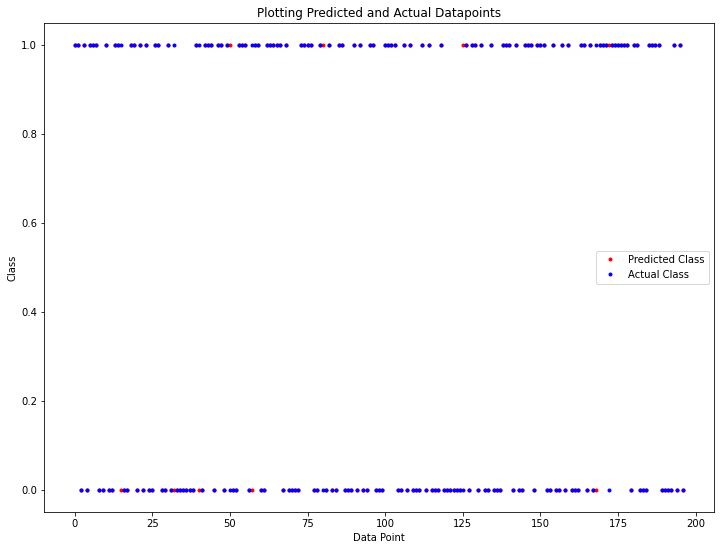

In [90]:
plt.figure(figsize=(12, 9))
plt.plot(yhat, 'r+', marker = '.', label = 'Predicted Class')
plt.plot(y_test, 'b+', marker='.', label = 'Actual Class')
plt.ylabel("Class")
plt.xlabel("Data Point")
plt.title("Plotting Predicted and Actual Datapoints")
plt.legend()
plt.show()

## Here we can see from here that the predicted and actual points are almost similar and hence we can infer our model is performing good.